In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from glob import glob
from tqdm import tqdm

# Load the data

Loading pandas dataframes from the csv files of class and method metrics.

In [2]:
# Load the data
collected_metrics = {}
for project_name in tqdm(os.listdir('../CollectedMetrics')):
    class_metrics = None
    method_metrics = None
    try:
        for file in glob(f'../CollectedMetrics/{project_name}/*.csv'):
            df = pd.read_csv(file)
            df['project'] = project_name
            if file.endswith('Class.csv'):
                class_metrics = df
            elif file.endswith('Method.csv'):
                method_metrics = df
            else:
                raise Exception('Unknown file type')
            collected_metrics[project_name] = (class_metrics, method_metrics)
    except Exception as e:
        print(f'Error in {project_name}: {e}')

100%|██████████| 118/118 [00:05<00:00, 23.36it/s]


In [3]:
projects = list(collected_metrics.keys())

In [4]:
collected_metrics[projects[0]][0].head()

,ID,Name,LongName,Parent,Component,Path,Line,Column,EndLine,EndColumn,...,WarningMinor,Anti Pattern,Clone Metric Rules,Cohesion Metric Rules,Complexity Metric Rules,Coupling Metric Rules,Documentation Metric Rules,Inheritance Metric Rules,Size Metric Rules,project
0,L142,ActionMods,AssistantComputerControl.ActionMods,L104,L103,D:\DataCollection\repos\AlbertMN_AssistantComp...,22,5,345,6,...,0,3,0,0,3,0,1,0,4,AlbertMN_AssistantComputerControl
1,L486,SoftwareUpdater,AssistantComputerControl.SoftwareUpdater,L104,L103,D:\DataCollection\repos\AlbertMN_AssistantComp...,20,5,237,6,...,0,1,0,1,1,1,1,0,2,AlbertMN_AssistantComputerControl
2,L375,ActionChecker,AssistantComputerControl.ActionChecker,L104,L103,D:\DataCollection\repos\AlbertMN_AssistantComp...,21,5,616,6,...,0,4,0,2,4,2,5,0,10,AlbertMN_AssistantComputerControl
3,L1037,Actions,AssistantComputerControl.Actions,L104,L103,D:\DataCollection\repos\AlbertMN_AssistantComp...,22,5,1202,6,...,0,11,16,1,11,0,1,0,9,AlbertMN_AssistantComputerControl
4,L1528,AdvancedSettings,AssistantComputerControl.AdvancedSettings,L104,L103,D:\DataCollection\repos\AlbertMN_AssistantComp...,9,5,77,6,...,0,1,10,1,0,0,1,0,3,AlbertMN_AssistantComputerControl


## Load the metrics table and select the metrics

In [5]:
metrics_table = pd.read_csv('final_metrics_table.csv')
metrics_table.head()

,Abbreviation,Metric name,Category,Description
0,AD,API Documentation,Class,Ratio of the number of documented public metho...
1,CBO,Coupling Between Object classes,Class,Number of directly used other classes (e.g. by...
2,CC,Clone Coverage,Class,Ratio of code covered by code duplications in ...
3,CLOC,Comment Lines of Code,Class,Number of comment and documentation code lines...
4,DIT,Depth of Inheritance Tree,Class,Length of the path that leads from the class t...


In [6]:
class_metrics_list = metrics_table[metrics_table['Category'] == 'Class']['Abbreviation'].tolist()
method_metrics_list = metrics_table[metrics_table['Category'] == 'Method']['Abbreviation'].tolist()

In [7]:
collected_metrics[projects[0]][0][class_metrics_list].head()

,AD,CBO,CC,CLOC,DIT,DLOC,LCOM5,LLDC,LLOC,LOC,...,TNG,TNLG,TNLM,TNLPM,TNLS,TNM,TNOS,TNPM,TNS,WMC
0,0.500000,2,0.000000,36,0,5,1,0,253,324,...,0,0,7,3,0,7,144,3,0,79
1,0.000000,5,0.000000,15,0,0,2,0,176,218,...,0,0,5,3,0,5,118,3,0,44
2,0.222222,9,0.000000,35,0,2,3,0,456,559,...,1,1,13,10,0,13,282,10,0,123
3,0.078947,6,0.044637,78,0,6,2,64,1004,1179,...,0,0,46,37,0,46,548,37,0,268
4,0.000000,3,0.246429,48,0,8,3,0,172,224,...,0,0,6,1,0,6,130,1,0,12


In [8]:
collected_metrics[projects[0]][1][method_metrics_list].head()

,CC,CLOC,DLOC,LLDC,LLOC,LOC,McCC,NOI,NOS,NUMPAR,TCLOC,TLLOC,TLOC,TNOS
0,0.0,4,1,0,25,29,6,3.0,14,0,4,25,29,14
1,0.0,1,1,0,24,26,5,3.0,14,2,1,24,26,14
2,0.0,1,1,0,17,17,11,0.0,9,1,1,17,17,9
3,0.0,0,0,0,3,3,1,0.0,1,1,0,3,3,1
4,0.0,9,1,0,48,65,15,0.0,28,2,9,48,65,28


# Exploratory data analysis

## Missing values and zero columns

### Missing values

First, we will check if there are any missing values in the data. We will do this by summing the number of missing values in each column for each project.

In [123]:
class_metrics_missing = {}
method_metrics_missing = {}

for project_name in tqdm(projects):
    class_metrics_missing[project_name] = collected_metrics[project_name][0][class_metrics_list].isna().sum()
    method_metrics_missing[project_name] = collected_metrics[project_name][1][method_metrics_list].isna().sum()

class_metrics_missing = pd.DataFrame(class_metrics_missing).T
method_metrics_missing = pd.DataFrame(method_metrics_missing).T

print(f'Class metrics missing values: {class_metrics_missing.sum().sum()}')
print(f'Method metrics missing values: {method_metrics_missing.sum().sum()}')

100%|██████████| 118/118 [00:00<00:00, 632.24it/s]

Class metrics missing values: 0
Method metrics missing values: 13176


We can see that there are no missing values in the class metrics, but there are missing values in the method metrics. We will check the percentage of missing values in each metric.

In [127]:
total_classes = 0
total_methods = 0
for project_name in projects:
    total_classes += len(collected_metrics[project_name][0])
    total_methods += len(collected_metrics[project_name][1])

print(f'Total classes: {total_classes}')
print(f'Total methods: {total_methods}')

Total classes: 47264
Total methods: 569313


In [129]:
pd.DataFrame({'count': method_metrics_missing.sum(), 'percentage': method_metrics_missing.sum() / total_methods * 100}).sort_values('percentage', ascending=False)

,count,percentage
NOI,11854,2.082159
CC,1322,0.232210
CLOC,0,0.000000
DLOC,0,0.000000
LLDC,0,0.000000
LLOC,0,0.000000
LOC,0,0.000000
McCC,0,0.000000
NOS,0,0.000000
NUMPAR,0,0.000000


We can see that the percentage of missing values in each metric is very low. The metric with the highest percentage of missing values is NOI.

In [143]:
def print_desc(abbr, category):
    info = metrics_table[(metrics_table['Abbreviation'] == abbr) & (metrics_table['Category'] == category)]
    print(f'{info.iloc[0]["Metric name"]} ({info.iloc[0]["Abbreviation"]}): {info.iloc[0]["Description"]}')

In [211]:
print_desc('NOI', 'Method')

Number of Outgoing Invocations (NOI): Number of directly called methods. If a method is invoked several times, it is counted only once.


### Zero columns

Now we will check if there are any columns that have only zero values. We will do this by counting the number of columns that have only zero values for each project and metric.

In [134]:
class_metrics_zero = {}
method_metrics_zero = {}

for project_name in tqdm(projects):
    class_metrics_zero[project_name] = (collected_metrics[project_name][0][class_metrics_list] == 0).all()
    method_metrics_zero[project_name] = (collected_metrics[project_name][1][method_metrics_list] == 0).all()

class_metrics_zero = pd.DataFrame(class_metrics_zero).T
method_metrics_zero = pd.DataFrame(method_metrics_zero).T

print(f'Class metrics zero columns: {class_metrics_zero.sum().sum()}')
print(f'Method metrics zero columns: {method_metrics_zero.sum().sum()}')

100%|██████████| 118/118 [00:00<00:00, 601.79it/s]

Class metrics zero columns: 211
Method metrics zero columns: 40


In [146]:
pd.DataFrame({'count': class_metrics_zero.sum(), 'percentage': class_metrics_zero.sum() / len(class_metrics_zero) * 100}).sort_values('percentage', ascending=False)

,count,percentage
NOD,24,20.338983
NOC,24,20.338983
LLDC,23,19.491525
NOP,20,16.949153
CC,20,16.949153
DIT,20,16.949153
NOA,20,16.949153
NLS,6,5.084746
TNS,6,5.084746
TNLS,6,5.084746


In [150]:
print(f'There are {len(class_metrics_zero.columns[class_metrics_zero.sum() > 0])}/{len(class_metrics_zero.columns)} class metrics that have zero columns in some projects.')

There are 24/40 class metrics that have zero columns in some projects.


We can see that there are 24 metrics that have zero columns in some projects.

In [212]:
print('Metrics with at least 20 zero columns in some projects:\n')

for metric in class_metrics_zero.columns[class_metrics_zero.sum() >= 20]:
    print_desc(metric, 'Class')

Metrics with at least 20 zero columns in some projects:

Clone Coverage (CC): Ratio of code covered by code duplications in the source code element to the size of the source code element, expressed in terms of the number of syntactic entities (statements, expressions, etc.).
Depth of Inheritance Tree (DIT): Length of the path that leads from the class to its farthest ancestor in the inheritance tree.
Logical Lines of Duplicated Code (LLDC): Number of logical code lines (non-empty, non-comment lines) covered by code duplications in the source code element.
Number of Ancestors (NOA): Number of classes and interfaces from which the class is directly or indirectly inherited.
Number of Children (NOC): Number of classes and interfaces which are directly derived from the class.
Number of Descendants (NOD): Number of classes and interfaces which are directly or indirectly derived from the class.
Number of Parents (NOP): Number of classes and interfaces from which the class is directly inherite

Now we will check the percentage of zero columns in each method metric.

In [154]:
pd.DataFrame({'count': method_metrics_zero.sum(), 'percentage': method_metrics_zero.sum() / len(method_metrics_zero) * 100}).sort_values('percentage', ascending=False)

,count,percentage
LLDC,20,16.949153
CC,16,13.559322
DLOC,4,3.389831
CLOC,0,0.000000
LLOC,0,0.000000
LOC,0,0.000000
McCC,0,0.000000
NOI,0,0.000000
NOS,0,0.000000
NUMPAR,0,0.000000


We can see that there are only 3 metrics that have zero columns in some projects. These metrics are: LLDC, CC and DLOC. However, the percentage of zero columns is pretty low, no more than 17%.

In [213]:
print('Metrics with at least 1 zero column in some projects:\n')

for metric in method_metrics_zero.columns[method_metrics_zero.sum() > 0]:
    print_desc(metric, 'Method')

Metrics with at least 1 zero column in some projects:

Clone Coverage (CC): Ratio of code covered by code duplications in the source code element to the size of the source code element, expressed in terms of the number of syntactic entities (statements, expressions, etc.).
Documentation Lines of Code (DLOC): Number of documentation code lines of the method.
Logical Lines of Duplicated Code (LLDC): Number of logical code lines (non-empty, non-comment lines) covered by code duplications in the source code element.


## Statistics of each metric

To get a better understanding of the data, we will get the statistics of each metric for each project.

In [69]:
class_metrics_agg = {}
method_metrics_agg = {}

for project_name in tqdm(projects):
    class_metrics_agg[project_name] = collected_metrics[project_name][0][class_metrics_list].describe()
    method_metrics_agg[project_name] = collected_metrics[project_name][1][method_metrics_list].describe()

100%|██████████| 118/118 [00:06<00:00, 18.59it/s]


In [70]:
class_metrics_agg[projects[0]]

,AD,CBO,CC,CLOC,DIT,DLOC,LCOM5,LLDC,LLOC,LOC,...,TNG,TNLG,TNLM,TNLPM,TNLS,TNM,TNOS,TNPM,TNS,WMC
count,26.000000,26.000000,26.000000,26.00000,26.0,26.000000,26.000000,26.000000,26.000000,26.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,0.126907,3.115385,0.026309,25.50000,0.0,5.307692,2.769231,2.461538,203.961538,243.961538,...,1.846154,1.846154,12.423077,8.423077,1.500000,12.423077,126.192308,8.423077,1.500000,41.692308
std,0.232888,3.153752,0.076137,30.21953,0.0,7.692954,2.846861,12.551433,243.734525,273.051567,...,5.787520,5.787520,13.703060,12.684394,5.515433,13.703060,158.230722,12.684394,5.515433,59.568965
min,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,2.25000,0.0,0.000000,1.000000,0.000000,49.750000,76.500000,...,0.000000,0.000000,5.000000,1.250000,0.000000,5.000000,24.250000,1.250000,0.000000,10.000000
50%,0.000000,2.000000,0.000000,16.00000,0.0,2.500000,2.000000,0.000000,106.000000,132.000000,...,0.000000,0.000000,7.500000,3.500000,0.000000,7.500000,61.500000,3.500000,0.000000,21.000000
75%,0.126880,5.000000,0.000000,35.75000,0.0,8.000000,3.000000,0.000000,244.750000,305.250000,...,0.750000,0.750000,13.000000,10.750000,0.000000,13.000000,129.000000,10.750000,0.000000,41.000000
max,0.800000,10.000000,0.303688,115.00000,0.0,33.000000,11.000000,64.000000,1004.000000,1179.000000,...,29.000000,29.000000,57.000000,57.000000,28.000000,57.000000,548.000000,57.000000,28.000000,268.000000


Now for each metric and statistic, we will get the mean and standard deviation.

In [109]:
class_metrics_list = {}
method_metrics_list = {}

for project_name in tqdm(projects):
    for metric in class_metrics_agg[project_name].columns:
        if metric not in class_metrics_list:
            class_metrics_list[metric] = {}
        if 'mean' not in class_metrics_list[metric]:
            class_metrics_list[metric]['mean'] = []
        if 'std' not in class_metrics_list[metric]:
            class_metrics_list[metric]['std'] = []
        class_metrics_list[metric]['mean'].append(class_metrics_agg[project_name][metric]['mean'])
        class_metrics_list[metric]['std'].append(class_metrics_agg[project_name][metric]['std'])
    for metric in method_metrics_agg[project_name].columns:
        if metric not in method_metrics_list:
            method_metrics_list[metric] = {}
        if 'mean' not in method_metrics_list[metric]:
            method_metrics_list[metric]['mean'] = []
        if 'std' not in method_metrics_list[metric]:
            method_metrics_list[metric]['std'] = []
        method_metrics_list[metric]['mean'].append(method_metrics_agg[project_name][metric]['mean'])
        method_metrics_list[metric]['std'].append(method_metrics_agg[project_name][metric]['std'])

for metric in class_metrics_list:
    class_metrics_list[metric]['mean'] = pd.Series(class_metrics_list[metric]['mean'])
    class_metrics_list[metric]['std'] = pd.Series(class_metrics_list[metric]['std'])

for metric in method_metrics_list:
    method_metrics_list[metric]['mean'] = pd.Series(method_metrics_list[metric]['mean'])
    method_metrics_list[metric]['std'] = pd.Series(method_metrics_list[metric]['std'])

100%|██████████| 118/118 [00:00<00:00, 2356.13it/s]


In [91]:
mean_avg_class_metrics = {}
mean_avg_method_metrics = {}

for metric in class_metrics_list:
    mean_avg_class_metrics[metric] = {}
    mean_avg_class_metrics[metric]['mean'] = class_metrics_list[metric]['mean'].mean()
    mean_avg_class_metrics[metric]['std'] = class_metrics_list[metric]['std'].mean()

for metric in method_metrics_list:
    mean_avg_method_metrics[metric] = {}
    mean_avg_method_metrics[metric]['mean'] = method_metrics_list[metric]['mean'].mean()
    mean_avg_method_metrics[metric]['std'] = method_metrics_list[metric]['std'].mean()

mean_avg_class_metrics = pd.DataFrame(mean_avg_class_metrics).T
mean_avg_method_metrics = pd.DataFrame(mean_avg_method_metrics).T

mean_avg_class_metrics

,mean,std
AD,0.193218,0.261099
CBO,3.633977,5.491740
CC,0.034319,0.097235
CLOC,39.203629,83.416769
DIT,0.489553,0.653320
DLOC,31.122480,64.274820
LCOM5,9.523923,15.653804
LLDC,6.584032,34.685210
LLOC,151.394533,299.521662
LOC,223.099522,428.641948


Plotting the mean and standard deviation of each metric.

### Visualization of the mean and standard deviation of each metric

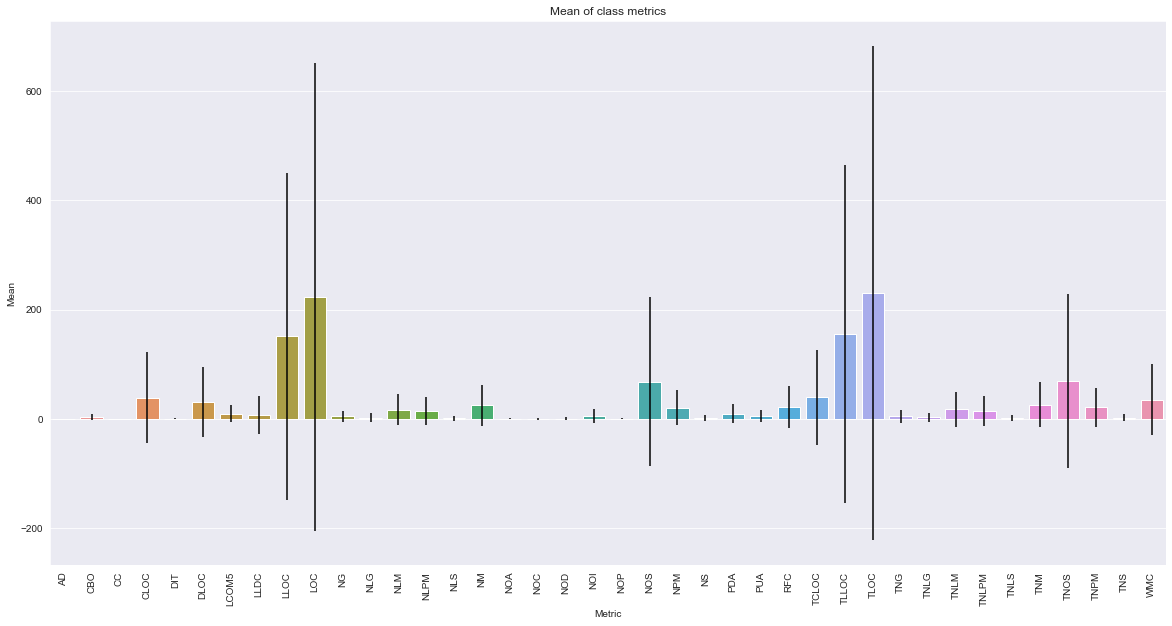

In [94]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=mean_avg_class_metrics.index, y='mean', data=mean_avg_class_metrics, ax=ax, yerr=mean_avg_class_metrics['std'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Mean of class metrics')
ax.set_ylabel('Mean')
ax.set_xlabel('Metric')
plt.show()

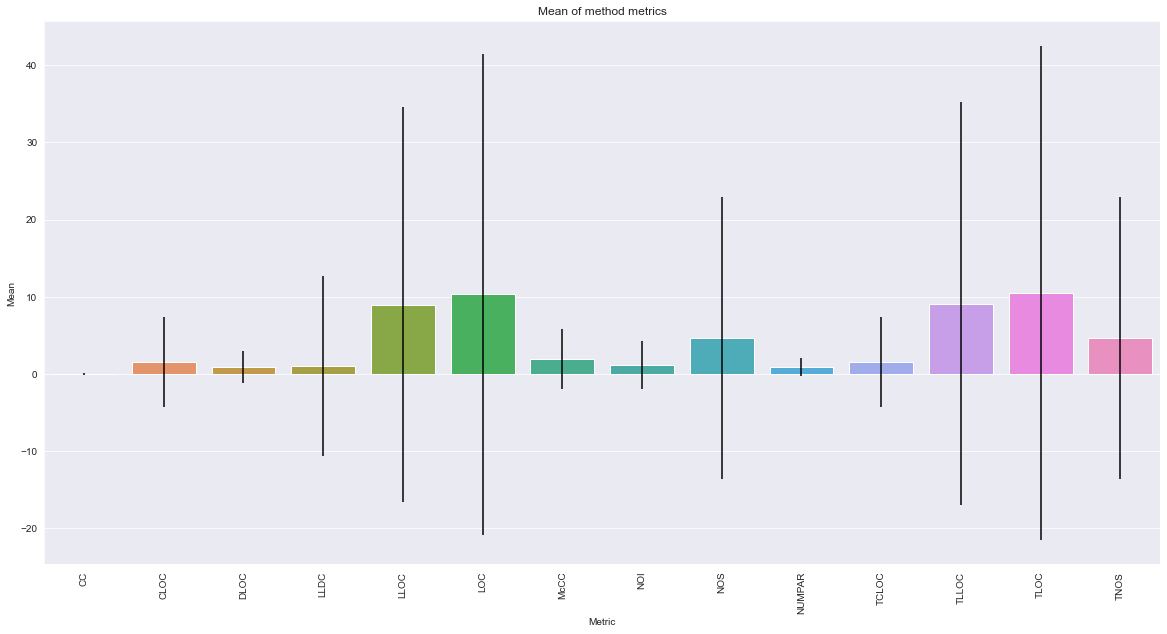

In [95]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x=mean_avg_method_metrics.index, y='mean', data=mean_avg_method_metrics, ax=ax, yerr=mean_avg_method_metrics['std'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Mean of method metrics')
ax.set_ylabel('Mean')
ax.set_xlabel('Metric')
plt.show()

We can see that the standard deviation is very high for some metrics. This is because the values of these metrics are very different between projects. For example, the number of methods in a class can be very different between projects.

We can also see that most of repositories have very little number of duplicated lines of code. This is because the mean of the metric LLDC is very low.

Finally we can see that the mean and standard deviation of the metric DIT is very low. This means that most of the classes in the repositories have a very low depth of inheritance tree and most of the classes are not inherited from other classes.

#### Boxplot of the mean of each metric.

In [114]:
class_metrics_list_temp = []
for i in range(len(class_metrics_list['AD']['mean'])):
    class_metrics_list_temp.append({f'{metric}': class_metrics_list[metric]['mean'][i] for metric in class_metrics_list})

class_metrics_mean = pd.DataFrame.from_dict(class_metrics_list_temp)
class_metrics_mean.head()

,AD,CBO,CC,CLOC,DIT,DLOC,LCOM5,LLDC,LLOC,LOC,...,TNG,TNLG,TNLM,TNLPM,TNLS,TNM,TNOS,TNPM,TNS,WMC
0,0.126907,3.115385,0.026309,25.500000,0.000000,5.307692,2.769231,2.461538,203.961538,243.961538,...,1.846154,1.846154,12.423077,8.423077,1.500000,12.423077,126.192308,8.423077,1.500000,41.692308
1,0.328137,3.627376,0.016188,11.220532,0.231939,7.452471,2.463878,45.250951,109.019011,137.825095,...,2.205323,1.615970,9.711027,6.323194,1.471483,12.399240,61.129278,7.326996,1.984791,19.288973
2,0.088235,1.500000,0.000000,5.735294,0.117647,2.058824,1.000000,0.000000,56.264706,70.911765,...,1.470588,1.117647,5.176471,3.205882,0.823529,6.029412,28.617647,4.058824,1.176471,8.558824
3,0.202606,4.756972,0.018515,5.184263,1.008964,3.148406,1.636454,3.210159,62.024900,79.354582,...,4.793825,1.342629,6.828685,4.535857,0.829681,20.163347,23.501992,15.815737,3.053785,15.858566
4,0.368343,1.682927,0.043852,19.585366,0.024390,12.121951,1.878049,1.975610,110.268293,144.829268,...,1.878049,1.878049,9.731707,5.024390,0.634146,9.780488,54.121951,5.073171,0.634146,19.146341


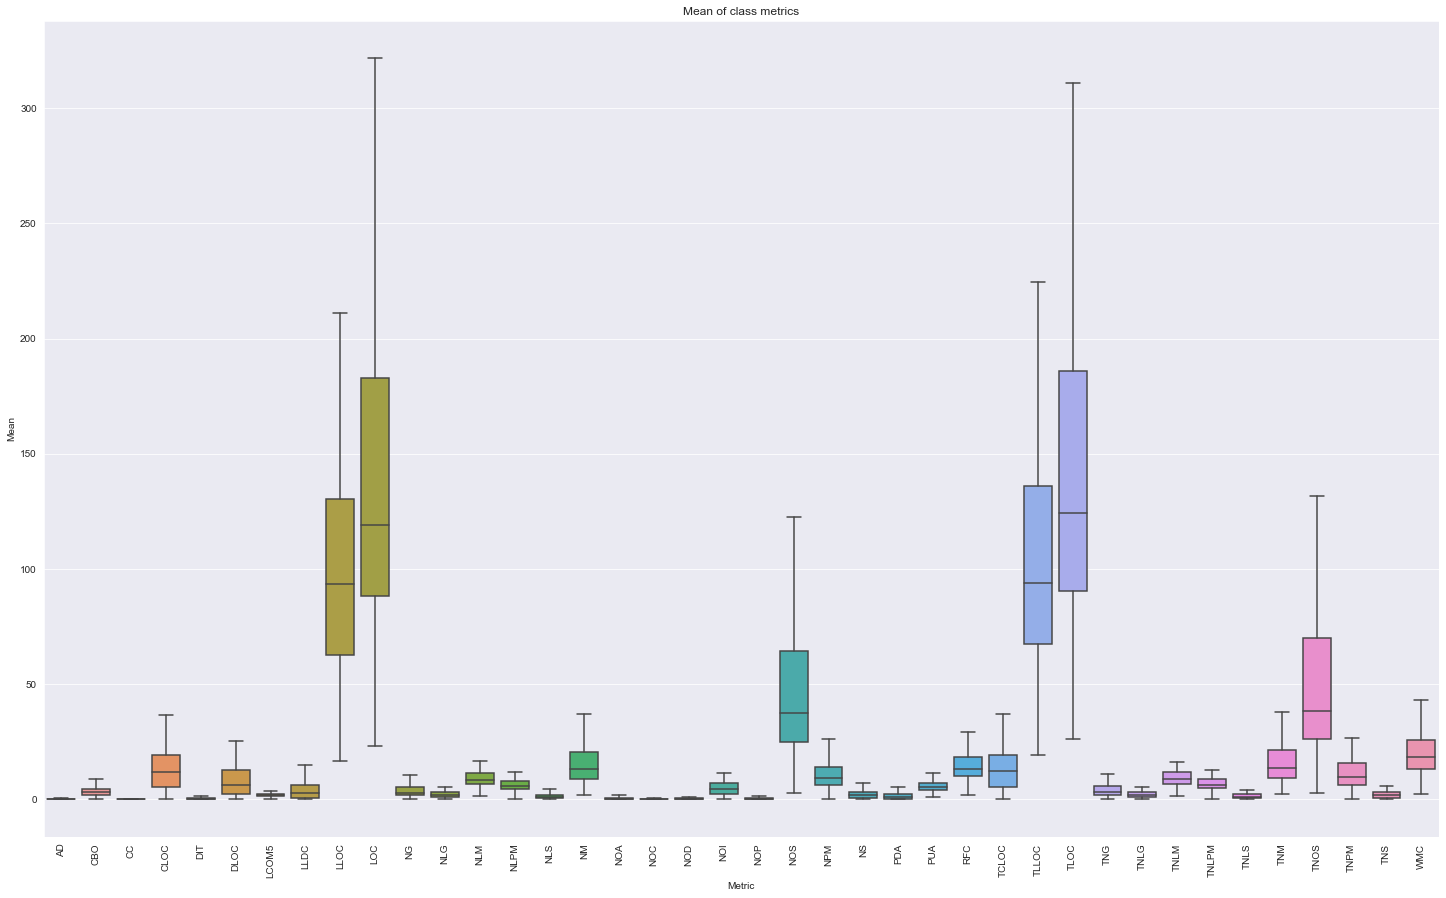

In [118]:
fig, ax = plt.subplots(figsize=(25, 15))
sns.boxplot(data=class_metrics_mean, ax=ax, showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Mean of class metrics')
ax.set_ylabel('Mean')
ax.set_xlabel('Metric')
plt.show()

In [120]:
method_metrics_list_temp = []
for i in range(len(method_metrics_list['LLOC']['mean'])):
    method_metrics_list_temp.append({f'{metric}': method_metrics_list[metric]['mean'][i] for metric in method_metrics_list})

method_metrics_mean = pd.DataFrame.from_dict(method_metrics_list_temp)
method_metrics_mean.head()

,CC,CLOC,DLOC,LLDC,LLOC,LOC,McCC,NOI,NOS,NUMPAR,TCLOC,TLLOC,TLOC,TNOS
0,0.007156,1.650990,0.351485,0.655941,12.438119,13.561881,2.792079,1.166667,7.881188,0.878713,1.650990,12.549505,14.888614,7.881188
1,0.076700,1.273559,0.873559,4.829026,11.029026,12.265209,2.047316,1.522673,6.395229,1.256064,1.273559,11.055666,12.302187,6.395229
2,0.000000,0.985000,0.360000,0.000000,8.790000,10.255000,1.470000,0.690355,4.865000,0.790000,0.985000,8.880000,10.510000,4.865000
3,0.008123,0.643763,0.358885,0.449199,7.262021,8.131986,2.233868,1.335213,3.280279,0.903972,0.643763,7.291429,8.253937,3.280279
4,0.008303,1.677201,0.986456,0.760722,9.081264,9.950339,1.785553,0.639269,4.959368,0.957111,1.677201,9.257336,10.496614,4.959368


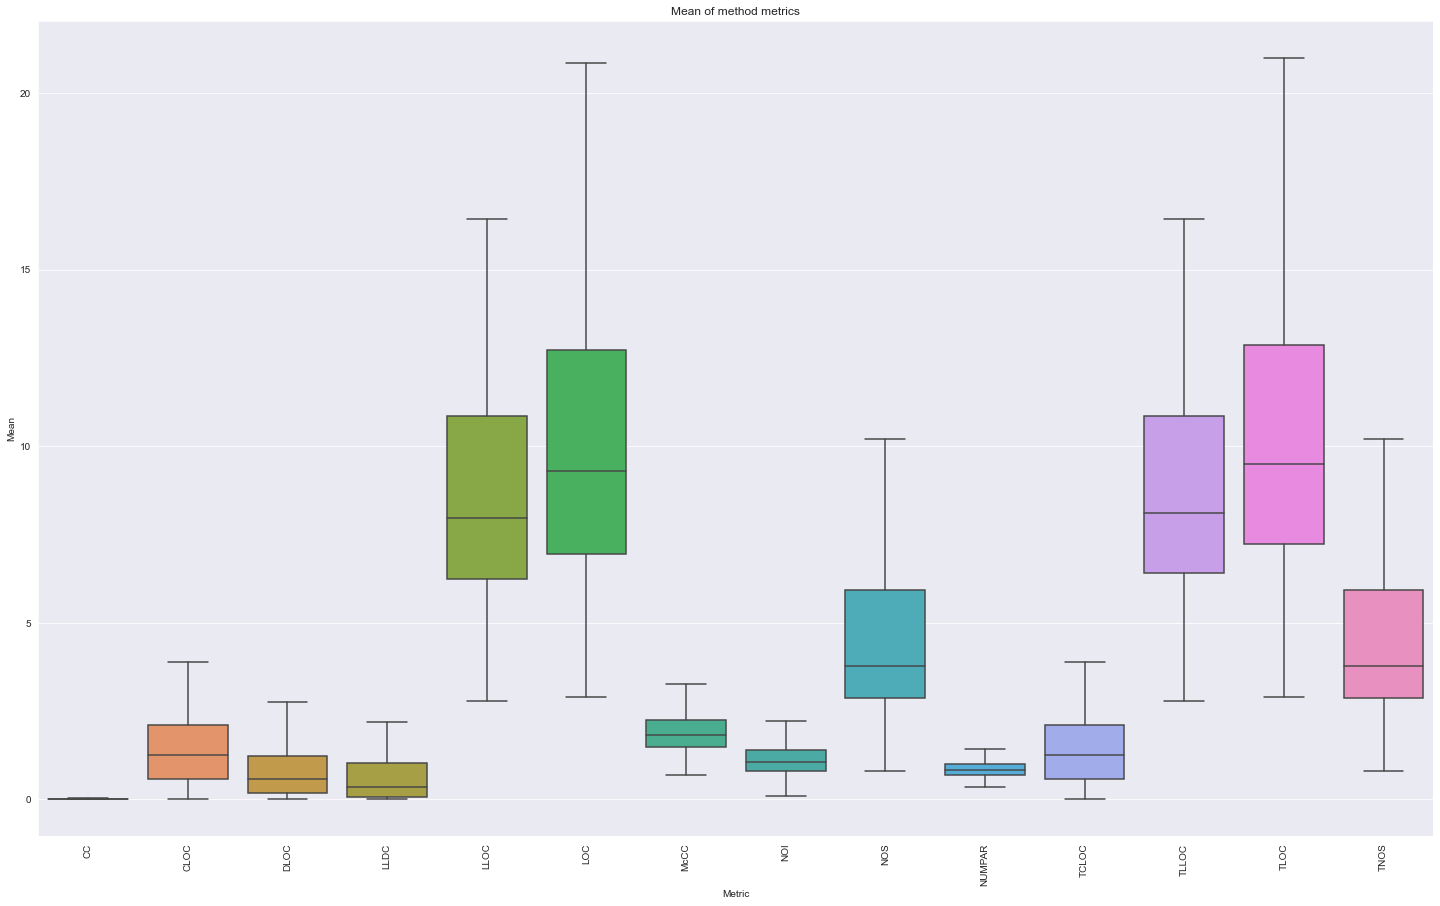

In [121]:
fig, ax = plt.subplots(figsize=(25, 15))
sns.boxplot(data=method_metrics_mean, ax=ax, showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Mean of method metrics')
ax.set_ylabel('Mean')
ax.set_xlabel('Metric')
plt.show()

### Euclidean distance between classes and methods within a project

Now let's calculate the mean euclidean distance between classes and methods for each project.

In [11]:
from scipy.spatial import distance

class_metrics_euclidean = {}
method_metrics_euclidean = {}

for project_name in tqdm(projects):
    class_metrics_euclidean[project_name] = distance.pdist(collected_metrics[project_name][0][class_metrics_list], metric='euclidean').mean()
    method_metrics_euclidean[project_name] = distance.pdist(collected_metrics[project_name][1][method_metrics_list], metric='euclidean').mean()

class_metrics_euclidean = pd.Series(class_metrics_euclidean)
method_metrics_euclidean = pd.Series(method_metrics_euclidean)

class_metrics_euclidean

 36%|███▌      | 42/118 [01:38<01:09,  1.10it/s]C:\Users\Threeteck\AppData\Local\Temp\ipykernel_74092\275881501.py:7: RuntimeWarning: Mean of empty slice.
  class_metrics_euclidean[project_name] = distance.pdist(collected_metrics[project_name][0][class_metrics_list], metric='euclidean').mean()
C:\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 118/118 [02:18<00:00,  1.17s/it]


AlbertMN_AssistantComputerControl                 606.199726
aloneguid_parquet-dotnet                          441.349759
AlturosDestinations_Alturos.Yolo                  189.320110
antonpup_Aurora                                   218.442241
architecture-building-systems_revitpythonshell    336.851656
                                                     ...    
WindowsGSM_WindowsGSM                             349.580192
WorldWideTelescope_wwt-windows-client             720.062954
xamarin_KimonoDesigner                            928.156320
zgynhqf_Rafy                                      285.749358
zlynn1990_SpaceSim                                300.354070
Length: 118, dtype: float64

Now let's plot the mean euclidean distance distribution for each project using histogram with approximation of the density function.

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


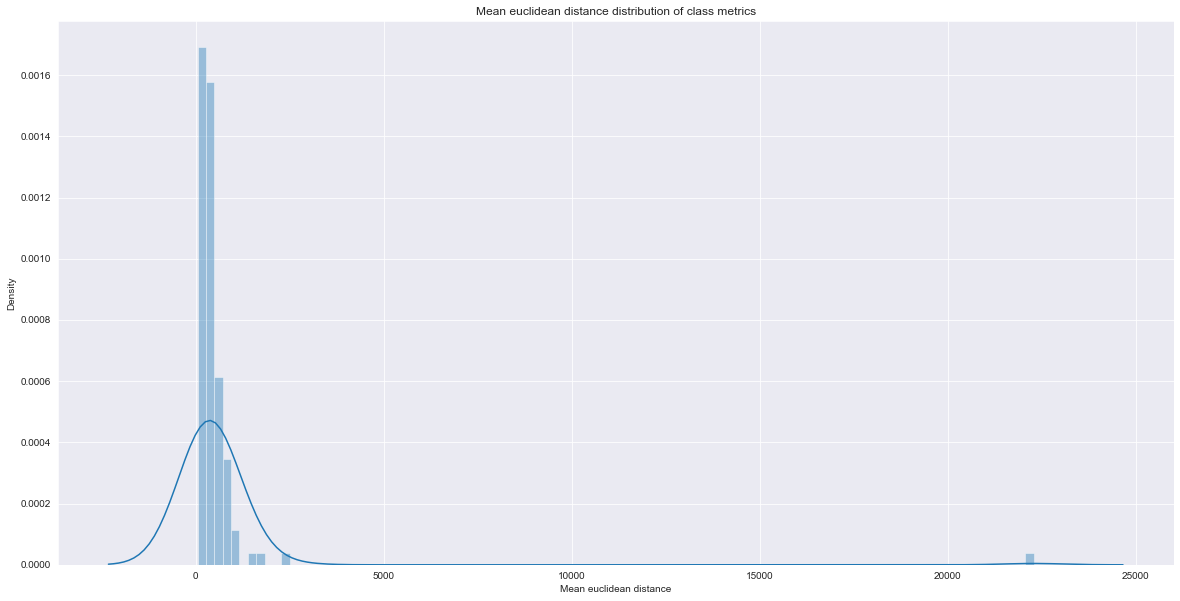

In [14]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.distplot(class_metrics_euclidean, ax=ax, kde=True, hist=True, bins=100)
ax.set_title('Mean euclidean distance distribution of class metrics')
ax.set_xlabel('Mean euclidean distance')
plt.show()

Now let's calculate the mean of the means of the euclidean distance between classes and methods in the same folder for each project.

In [18]:
class_metrics_euclidean_mean = {}
method_metrics_euclidean_mean = {}

for project_name in tqdm(projects):
    collected_metrics[project_name][0]['folder'] = collected_metrics[project_name][0]['Path'].apply(lambda x: '\\'.join(x.split('\\')[:-1]))
    collected_metrics[project_name][1]['folder'] = collected_metrics[project_name][1]['Path'].apply(lambda x: '\\'.join(x.split('\\')[:-1]))

for project_name in tqdm(projects):
    class_metrics_euclidean_mean[project_name] = collected_metrics[project_name][0].groupby('folder')[class_metrics_list].apply(lambda x: distance.pdist(x, metric='euclidean').mean()).mean()
    method_metrics_euclidean_mean[project_name] = collected_metrics[project_name][1].groupby('folder')[method_metrics_list].apply(lambda x: distance.pdist(x, metric='euclidean').mean()).mean()

class_metrics_euclidean_mean[projects[0]]

  0%|          | 0/118 [00:00<?, ?it/s]C:\Users\Threeteck\AppData\Local\Temp\ipykernel_74092\1994376643.py:9: RuntimeWarning: Mean of empty slice.
  class_metrics_euclidean_mean[project_name] = collected_metrics[project_name][0].groupby('folder')[class_metrics_list].apply(lambda x: distance.pdist(x, metric='euclidean').mean()).mean()
C:\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Threeteck\AppData\Local\Temp\ipykernel_74092\1994376643.py:10: RuntimeWarning: Mean of empty slice.
  method_metrics_euclidean_mean[project_name] = collected_metrics[project_name][1].groupby('folder')[method_metrics_list].apply(lambda x: distance.pdist(x, metric='euclidean').mean()).mean()
100%|██████████| 118/118 [00:07<00:00, 15.97it/s]


572.7386537045376

In [19]:
class_metrics_euclidean_mean = pd.Series(class_metrics_euclidean_mean)
method_metrics_euclidean_mean = pd.Series(method_metrics_euclidean_mean)

class_metrics_euclidean_mean

AlbertMN_AssistantComputerControl                 572.738654
aloneguid_parquet-dotnet                          479.571629
AlturosDestinations_Alturos.Yolo                  234.960253
antonpup_Aurora                                   231.451650
architecture-building-systems_revitpythonshell    494.691615
                                                     ...    
WindowsGSM_WindowsGSM                             413.459199
WorldWideTelescope_wwt-windows-client             510.959680
xamarin_KimonoDesigner                            766.210143
zgynhqf_Rafy                                      184.872853
zlynn1990_SpaceSim                                184.800920
Length: 118, dtype: float64

Now let's compare the distributions.

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


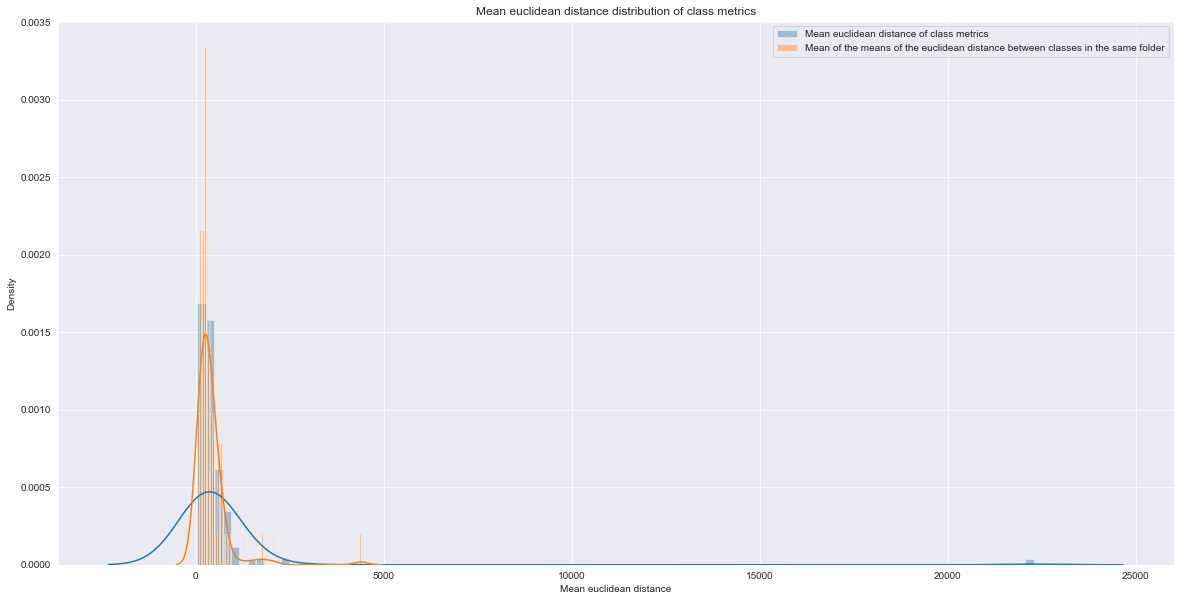

In [20]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.distplot(class_metrics_euclidean, ax=ax, kde=True, hist=True, bins=100, label='Mean euclidean distance of class metrics')
sns.distplot(class_metrics_euclidean_mean, ax=ax, kde=True, hist=True, bins=100, label='Mean of the means of the euclidean distance between classes in the same folder')
ax.set_title('Mean euclidean distance distribution of class metrics')
ax.set_xlabel('Mean euclidean distance')
ax.legend()
plt.show()

Let's remove the outliers and compare the distributions again.

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


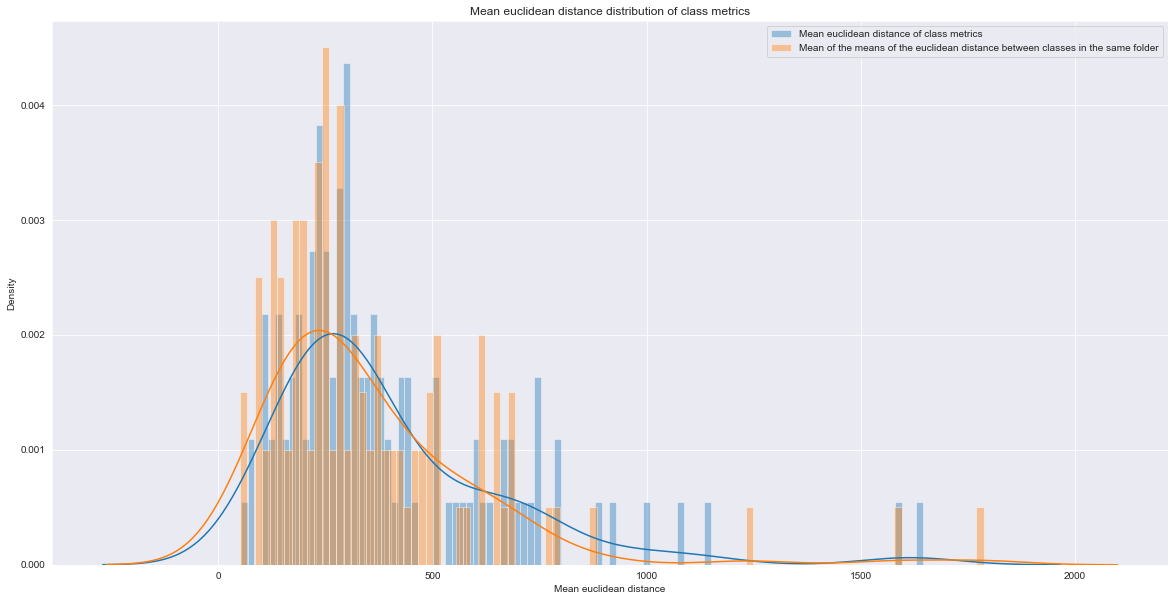

In [23]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.distplot(class_metrics_euclidean[class_metrics_euclidean < 2000], ax=ax, kde=True, hist=True, bins=100, label='Mean euclidean distance of class metrics')
sns.distplot(class_metrics_euclidean_mean[class_metrics_euclidean_mean < 2000], ax=ax, kde=True, hist=True, bins=100, label='Mean of the means of the euclidean distance between classes in the same folder')
ax.set_title('Mean euclidean distance distribution of class metrics')
ax.set_xlabel('Mean euclidean distance')
ax.legend()
plt.show()

We can see that the distributions have a shape of a normal distribution with a long tail.

Let's test the hypothesis that the mean of the means of the euclidean distance between classes in the same folder is less than the mean euclidean distance of class metrics.

In [29]:
from scipy.stats import ttest_ind


ttest_ind(class_metrics_euclidean[(class_metrics_euclidean < 2000) & (~class_metrics_euclidean.isna())], class_metrics_euclidean_mean[(class_metrics_euclidean_mean < 2000) & (~class_metrics_euclidean_mean.isna())], equal_var=False, alternative='less')

Ttest_indResult(statistic=1.1642917428587436, pvalue=0.8772380551877758)

We see that the hypothesis has to be rejected.

###

## Correlation between metrics

To find the correlation between metrics, we will calculate the correlation between each pair of metrics for each project. Then we will get the mean correlation between each pair of metrics.

In [31]:
class_metrics_corr = {}
method_metrics_corr = {}

for project_name in tqdm(projects):
    class_metrics_corr[project_name] = collected_metrics[project_name][0][class_metrics_list].corr()
    method_metrics_corr[project_name] = collected_metrics[project_name][1][method_metrics_list].corr()

class_metrics_corr[projects[0]]

100%|██████████| 118/118 [00:00<00:00, 272.75it/s]


,AD,CBO,CC,CLOC,DIT,DLOC,LCOM5,LLDC,LLOC,LOC,...,TNG,TNLG,TNLM,TNLPM,TNLS,TNM,TNOS,TNPM,TNS,WMC
AD,1.000000,0.214071,-0.187881,0.057257,NaN,0.642545,-0.110898,-0.042002,-0.061845,-0.035847,...,-0.150442,-0.150442,-0.130980,-0.090016,-0.154128,-0.130980,-0.088413,-0.090016,-0.154128,0.020349
CBO,0.214071,1.000000,0.226392,0.612141,NaN,0.366136,0.528797,0.186555,0.654272,0.625597,...,-0.292648,-0.292648,0.279277,0.146718,-0.265604,0.279277,0.690106,0.146718,-0.265604,0.563152
CC,-0.187881,0.226392,1.000000,0.706674,NaN,0.119673,0.485718,0.049097,0.324005,0.381221,...,-0.114635,-0.114635,0.168450,-0.066825,-0.097736,0.168450,0.439549,-0.066825,-0.097736,0.006250
CLOC,0.057257,0.612141,0.706674,1.000000,NaN,0.359777,0.575143,0.354338,0.772910,0.805578,...,-0.257296,-0.257296,0.442743,0.151676,-0.233630,0.442743,0.881682,0.151676,-0.233630,0.484316
DIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DLOC,0.642545,0.366136,0.119673,0.359777,NaN,1.000000,0.087387,0.018355,0.054512,0.113899,...,-0.186662,-0.186662,0.007822,-0.060416,-0.192317,0.007822,0.121435,-0.060416,-0.192317,-0.015933
LCOM5,-0.110898,0.528797,0.485718,0.575143,NaN,0.087387,1.000000,-0.055111,0.408243,0.376194,...,-0.305708,-0.305708,0.145128,-0.081374,-0.267487,0.145128,0.483519,-0.081374,-0.267487,0.149106
LLDC,-0.042002,0.186555,0.049097,0.354338,NaN,0.018355,-0.055111,1.000000,0.669484,0.698444,...,-0.065061,-0.065061,0.499770,0.459507,-0.055470,0.499770,0.543714,0.459507,-0.055470,0.774865
LLOC,-0.061845,0.654272,0.324005,0.772910,NaN,0.054512,0.408243,0.669484,1.000000,0.983107,...,-0.031310,-0.031310,0.714276,0.535853,-0.010251,0.714276,0.960932,0.535853,-0.010251,0.908088
LOC,-0.035847,0.625597,0.381221,0.805578,NaN,0.113899,0.376194,0.698444,0.983107,1.000000,...,-0.001548,-0.001548,0.730999,0.545431,0.015259,0.730999,0.949744,0.545431,0.015259,0.879432


In [32]:
class_metrics_corr_list = {}
method_metrics_corr_list = {}

for project_name in tqdm(projects):
    for metric1 in class_metrics_corr[project_name].columns:
        for metric2 in class_metrics_corr[project_name].columns:
            if metric1 not in class_metrics_corr_list:
                class_metrics_corr_list[metric1] = {}
            if metric2 not in class_metrics_corr_list[metric1]:
                class_metrics_corr_list[metric1][metric2] = []
            class_metrics_corr_list[metric1][metric2].append(class_metrics_corr[project_name][metric1][metric2])
    for metric1 in method_metrics_corr[project_name].columns:
        for metric2 in method_metrics_corr[project_name].columns:
            if metric1 not in method_metrics_corr_list:
                method_metrics_corr_list[metric1] = {}
            if metric2 not in method_metrics_corr_list[metric1]:
                method_metrics_corr_list[metric1][metric2] = []
            method_metrics_corr_list[metric1][metric2].append(method_metrics_corr[project_name][metric1][metric2])

for metric1 in class_metrics_corr_list:
    for metric2 in class_metrics_corr_list[metric1]:
        class_metrics_corr_list[metric1][metric2] = pd.Series(class_metrics_corr_list[metric1][metric2]).mean()

for metric1 in method_metrics_corr_list:
    for metric2 in method_metrics_corr_list[metric1]:
        method_metrics_corr_list[metric1][metric2] = pd.Series(method_metrics_corr_list[metric1][metric2]).mean()

100%|██████████| 118/118 [00:01<00:00, 110.40it/s]


#### Plotting the mean correlation between each pair of class metrics.

In [33]:
class_metrics_corr_list = pd.DataFrame(class_metrics_corr_list)
class_metrics_corr_list.head()

,AD,CBO,CC,CLOC,DIT,DLOC,LCOM5,LLDC,LLOC,LOC,...,TNG,TNLG,TNLM,TNLPM,TNLS,TNM,TNOS,TNPM,TNS,WMC
AD,1.000000,0.088486,0.012141,0.354185,0.000516,0.480796,0.063051,0.027518,0.103320,0.146345,...,0.043820,0.047022,0.094582,0.086322,0.022133,0.080336,0.101906,0.077755,0.020159,0.131724
CBO,0.088486,1.000000,0.175895,0.417704,0.256774,0.267731,0.353170,0.247194,0.627858,0.610241,...,0.181782,0.134827,0.450098,0.293993,0.154960,0.463882,0.626061,0.330843,0.198970,0.590940
CC,0.012141,0.175895,1.000000,0.191736,0.053357,0.086017,0.143199,0.641397,0.261322,0.245054,...,0.049393,0.036569,0.120872,0.067621,0.021728,0.129245,0.270580,0.080282,0.044263,0.161320
CLOC,0.354185,0.417704,0.191736,1.000000,-0.013118,0.804660,0.290214,0.240637,0.636132,0.719678,...,0.193689,0.238426,0.504838,0.352838,0.156372,0.406073,0.639999,0.279763,0.120647,0.604720
DIT,0.000516,0.256774,0.053357,-0.013118,1.000000,-0.011711,-0.030823,0.029471,0.009765,0.009594,...,0.279509,0.004094,0.011334,0.011473,0.008317,0.367527,0.010569,0.353109,0.255454,0.020561


<AxesSubplot:>

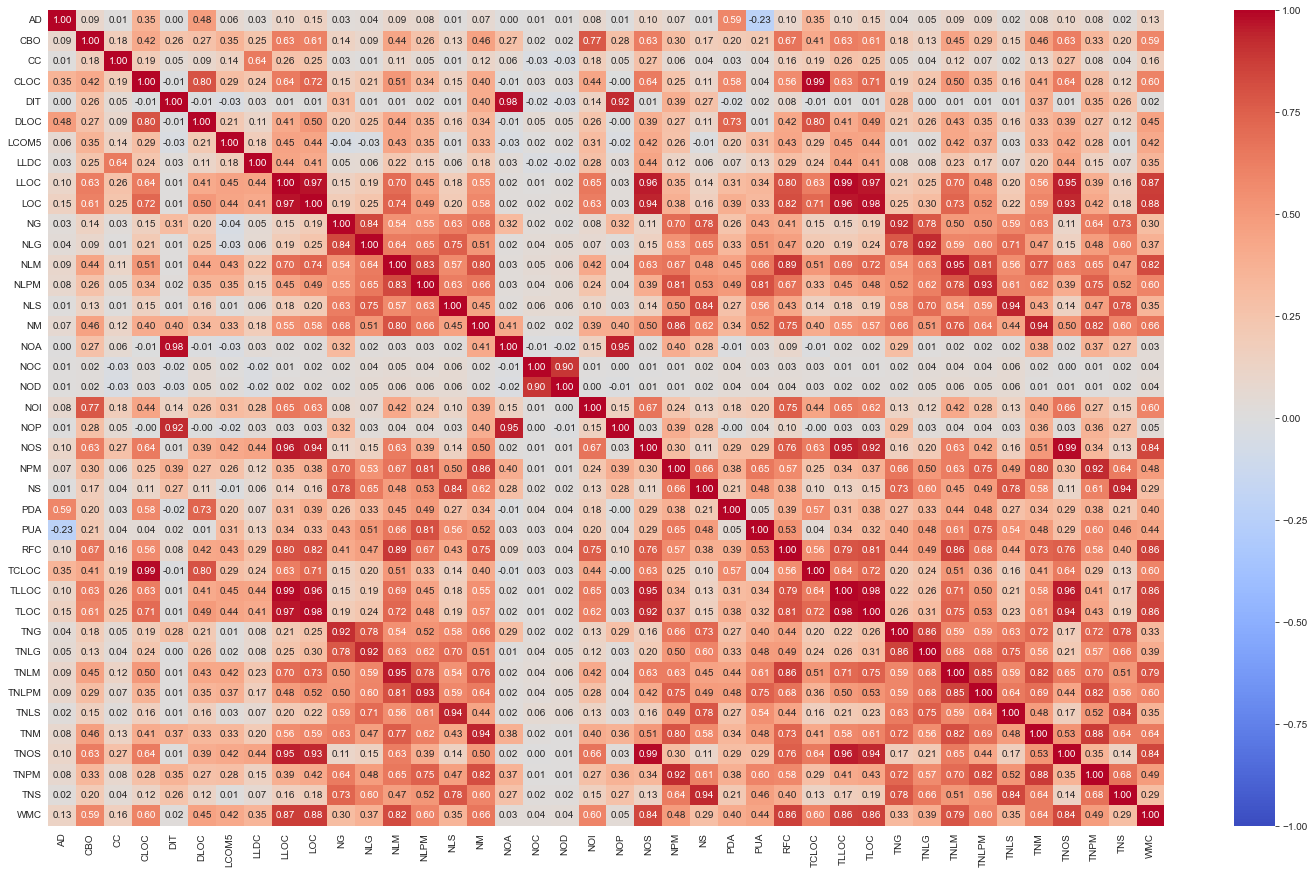

In [256]:
fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(class_metrics_corr_list, ax=ax, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

Now let's plot the mean correlation only between the class metrics that have a correlation higher than 0.5.

In [34]:
class_metrics_corr_list = class_metrics_corr_list[np.abs(class_metrics_corr_list) > 0.5]
for i in range(len(class_metrics_corr_list)):
    class_metrics_corr_list.iloc[i, i] = None
# delete rows and columns that have only NaN values
class_metrics_corr_list = class_metrics_corr_list.dropna(axis=0, how='all')
class_metrics_corr_list = class_metrics_corr_list.dropna(axis=1, how='all')
class_metrics_corr_list.head()

,AD,CBO,CC,CLOC,DIT,DLOC,LLDC,LLOC,LOC,NG,...,TNG,TNLG,TNLM,TNLPM,TNLS,TNM,TNOS,TNPM,TNS,WMC
AD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.627858,0.610241,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.626061,NaN,NaN,0.59094
CC,NaN,NaN,NaN,NaN,NaN,NaN,0.641397,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CLOC,NaN,NaN,NaN,NaN,NaN,0.80466,NaN,0.636132,0.719678,NaN,...,NaN,NaN,0.504838,NaN,NaN,NaN,0.639999,NaN,NaN,0.60472
DIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

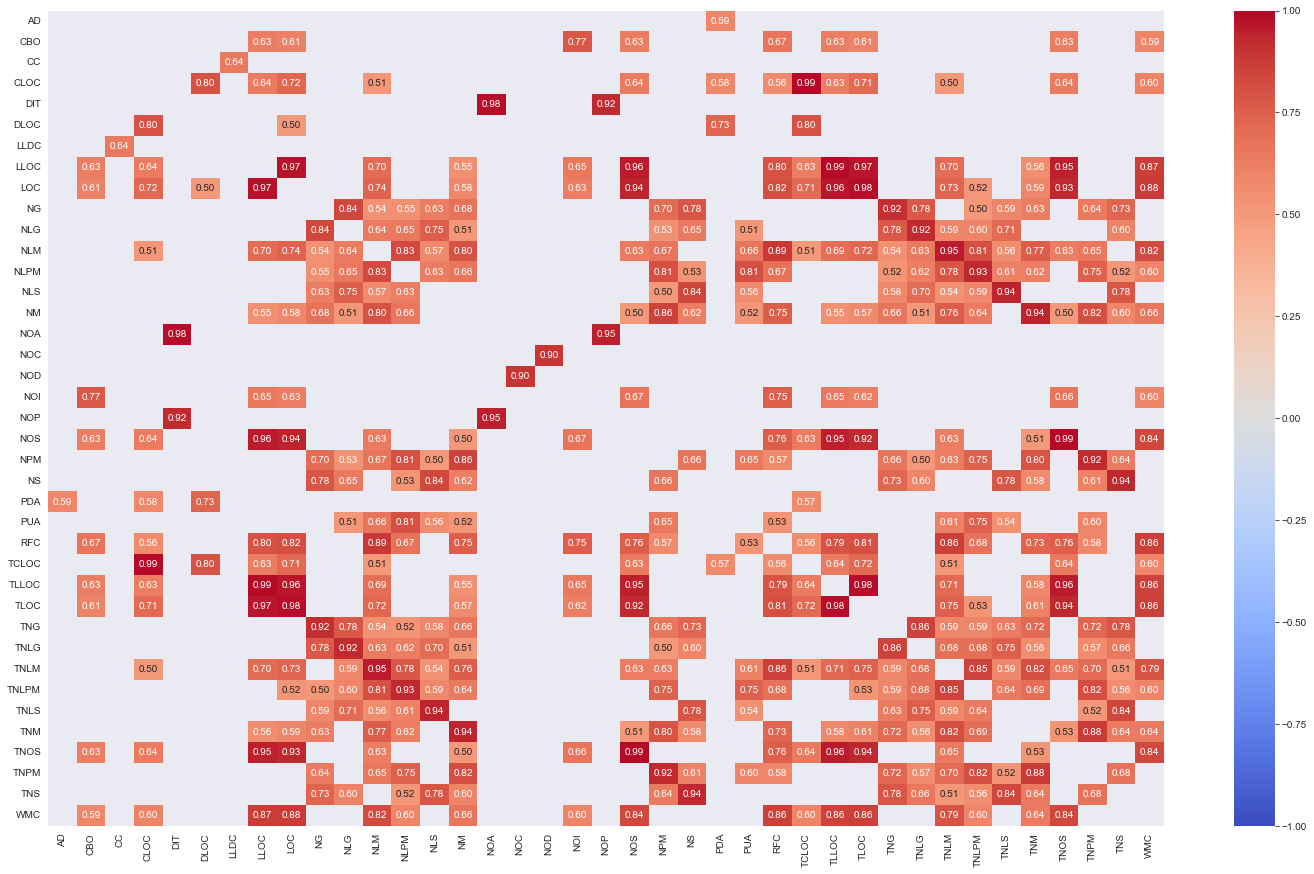

In [258]:
fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(class_metrics_corr_list, ax=ax, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

We can see, that there are a lot of pairs of metrics that have a high correlation. Some even have a correlation higher than 0.9.

In [35]:
print(f'There are {len(class_metrics_corr_list.columns)}/40 class metrics that have a correlation higher than 0.5 with at least one other metric.')
# count pairs of metrics that have a correlation higher than 0.5
def count_pairs(df, threshold):
    count = 0
    for i in range(len(df)):
        for j in range(i + 1, len(df)):
            if np.abs(df.iloc[i, j]) > threshold:
                count += 1
    return count

print(f'There are {count_pairs(class_metrics_corr_list, 0.5)}/{(40 * 39) / 2:.0f} ({count_pairs(class_metrics_corr_list, 0.5)/(40 * 39) * 100:.2f}%) pairs of class metrics that have a correlation higher than 0.5.')
print(f'There are {count_pairs(class_metrics_corr_list, 0.9)}/{(40 * 39) / 2:.0f} ({count_pairs(class_metrics_corr_list, 0.9)/(40 * 39) * 100:.2f}%) pairs of class metrics that have a correlation higher than 0.9.')
print(f'There are {count_pairs(class_metrics_corr_list, 0.97)}/{(40 * 39) / 2:.0f} ({count_pairs(class_metrics_corr_list, 0.97)/(40 * 39) * 100:.2f}%) pairs of class metrics that have a correlation higher than 0.97.')

There are 39/40 class metrics that have a correlation higher than 0.5 with at least one other metric.
There are 236/780 (15.13%) pairs of class metrics that have a correlation higher than 0.5.
There are 27/780 (1.73%) pairs of class metrics that have a correlation higher than 0.9.
There are 7/780 (0.45%) pairs of class metrics that have a correlation higher than 0.97.


In [36]:
print('Pairs of class metrics that have a correlation higher than 0.97:\n')

for i in range(len(class_metrics_corr_list)):
    for j in range(i + 1, len(class_metrics_corr_list)):
        if np.abs(class_metrics_corr_list.iloc[i, j]) > 0.97:
            print(f'{class_metrics_corr_list.columns[i]} - {class_metrics_corr_list.columns[j]}: {class_metrics_corr_list.iloc[i, j]:.2f}')

Pairs of class metrics that have a correlation higher than 0.97:

CLOC - TCLOC: 0.99
DIT - NOA: 0.98
LLOC - LOC: 0.97
LLOC - TLLOC: 0.99
LOC - TLOC: 0.98
NOS - TNOS: 0.99
TLLOC - TLOC: 0.98


As we can see, the highest correlation are between metrics related to number of lines. However, there are also metrics DIT, NOS, TNOS and NOA that have a high correlation with each other.

In [261]:
print_desc('DIT', 'Class')
print_desc('NOA', 'Class')
print()
print_desc('NOS', 'Class')
print_desc('TNOS', 'Class')

Depth of Inheritance Tree (DIT): Length of the path that leads from the class to its farthest ancestor in the inheritance tree.
Number of Ancestors (NOA): Number of classes and interfaces from which the class is directly or indirectly inherited.

Number of Statements (NOS): Number of statements in the class; however, the statements of its nested and anonymous classes are not included.
Total Number of Statements (TNOS): Number of statements in the class, including the statements of its nested and anonymous classes.


Now let's calculate the maximum set of metrics that would have only correlations lower than 0.75.
As a graph problem, we need to find the maximum independent set of the graph, where the nodes are the metrics and the edges connect metrics that have a correlation $\ge$ 0.75.

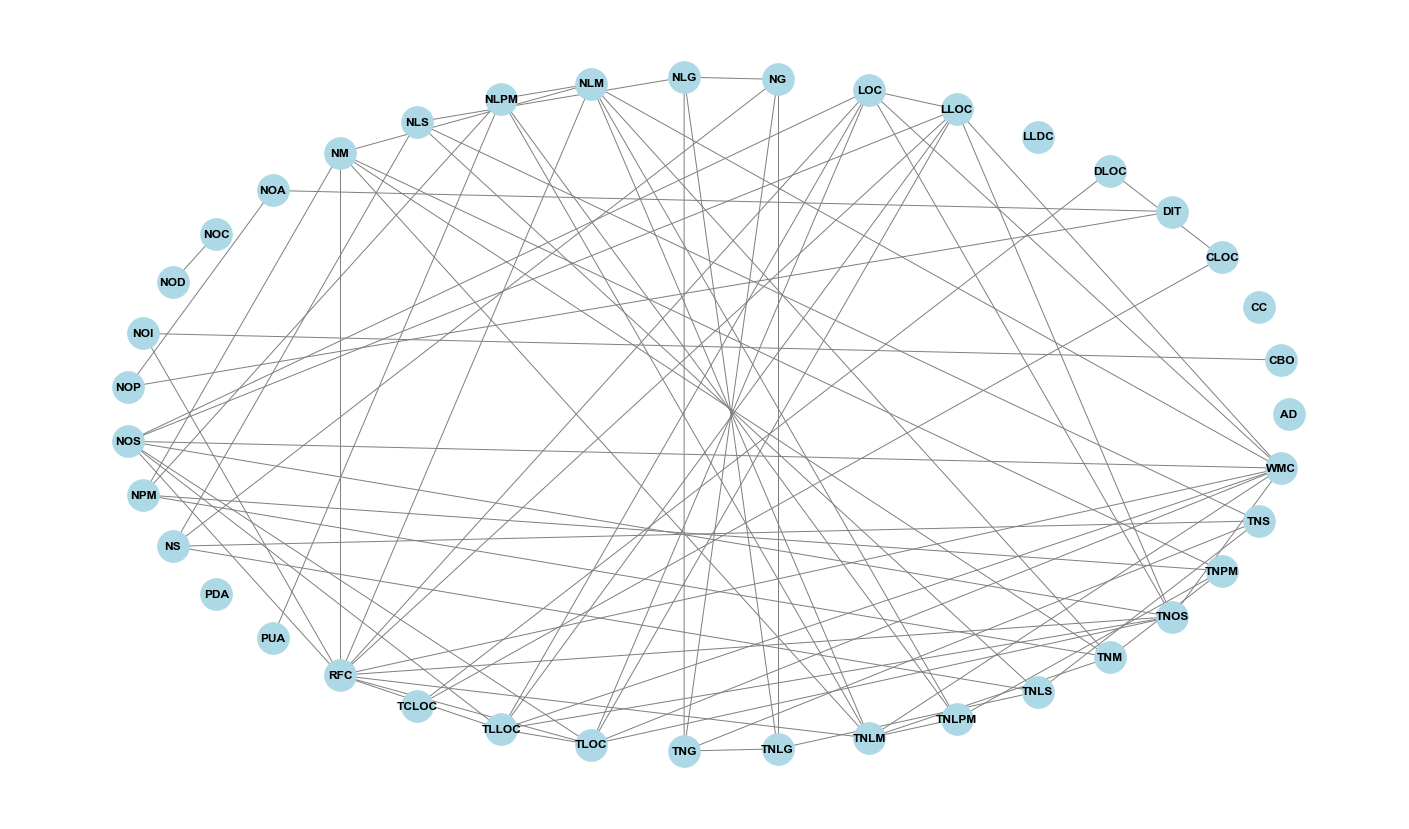

In [37]:
import networkx as nx

G = nx.Graph()
G.add_nodes_from(class_metrics_corr_list.columns)
for i in range(len(class_metrics_corr_list)):
    for j in range(i + 1, len(class_metrics_corr_list)):
        if np.abs(class_metrics_corr_list.iloc[i, j]) >= 0.75:
            G.add_edge(class_metrics_corr_list.columns[i], class_metrics_corr_list.columns[j])

fig, ax = plt.subplots(figsize=(25, 15))
layout = nx.circular_layout(G)
nx.draw(G, ax=ax, with_labels=True, font_weight='bold', node_size=1000, node_color='lightblue', edge_color='grey', pos=layout)
plt.show()

In [299]:
from networkx.algorithms import approximation as approx

max_ind_G = approx.maximum_independent_set(G)
print(f'The maximum independent set of the graph has {len(max_ind_G)} nodes.\n\n')

for metric in max_ind_G:
    print(f'')
    print_desc()

The maximum independent set of the graph has 14 nodes.


Public Documented API (PDA): The number of the documented public methods of the class (+1 if the class itself is documented). When calculating the metrics the nested, anonymous or local classes found in the class and their methods are not calculated.

Number of Children (NOC): Number of classes and interfaces which are directly derived from the class.

Number of Getters (NG): Number of getter methods in the class, including the inherited ones; however, the getter methods of its nested and anonymous classes are not included. Methods that override abstract methods are not counted.

Logical Lines of Code (LLOC): Number of non-empty and non-comment code lines of the class, including the non-empty and non-comment lines of its local methods; however, its nested and anonymous classes are not included.

Logical Lines of Duplicated Code (LLDC): Number of logical code lines (non-empty, non-comment lines) covered by code duplications in the

One interesting insight from the graph we can get is the number of connected components.

In [300]:
print(f'The graph has {nx.number_connected_components(G)} connected components.')

The graph has 9 connected components.


Let plot the graph with the connected components in a layout that will show the connected components.

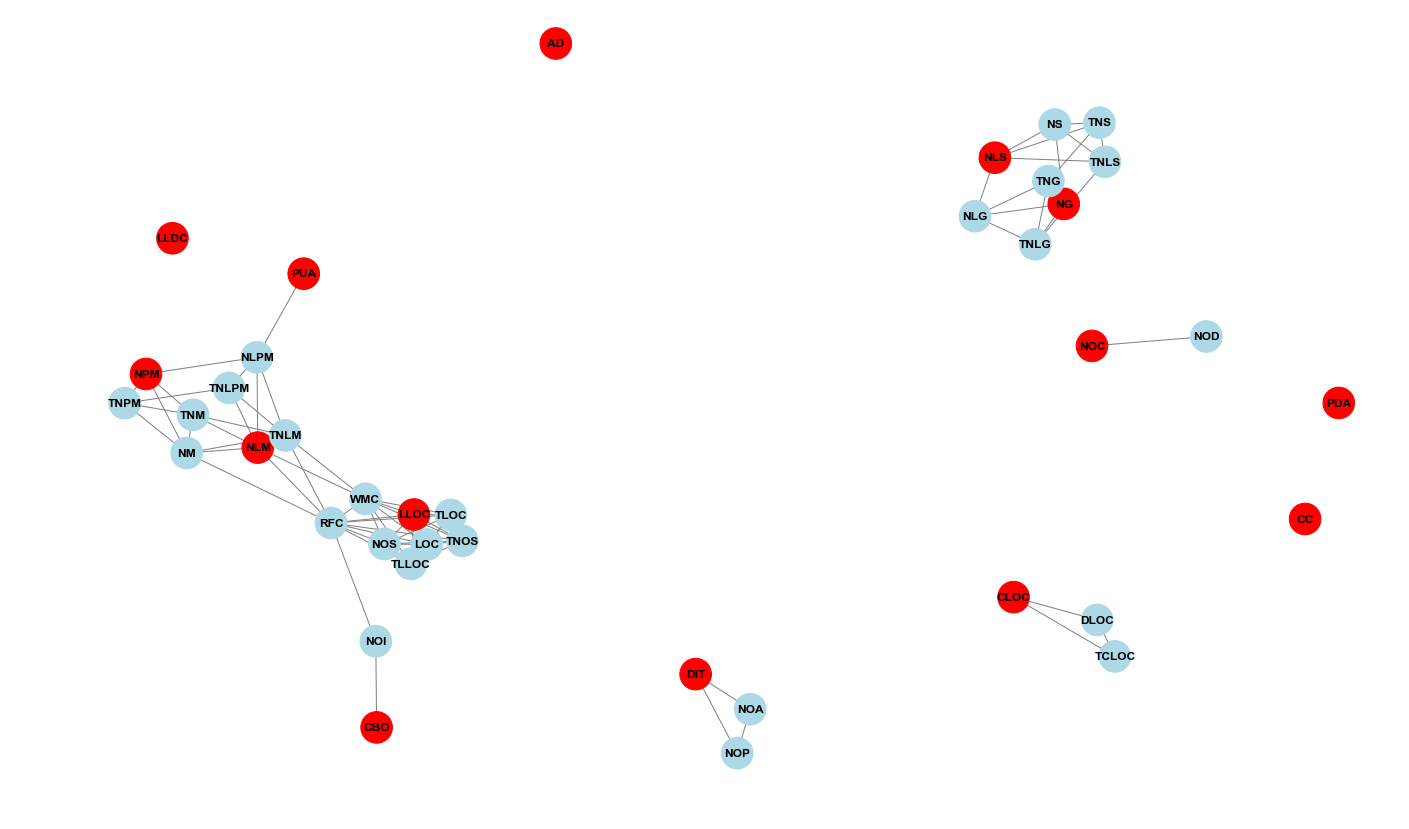

In [301]:
fig, ax = plt.subplots(figsize=(25, 15))
layout = nx.layout.spring_layout(G, k=0.35)
color_map = [] # highlight the nodes in the maximum independent set
for node in G:
    if node in max_ind_G:
        color_map.append('red')
    else:
        color_map.append('lightblue')
nx.draw(G, ax=ax, with_labels=True, font_weight='bold', node_size=1000, node_color=color_map, edge_color='grey', pos=layout)
plt.show()

Notably, cluster of metrics related to lines of code and number of statements are connected to cluster of metrics related to number of methods through the metric RFC and WMC.

In [276]:
print_desc('RFC', 'Class')
print_desc('WMC', 'Class')

Response set For Class (RFC): Number of local (i.e. not inherited) methods in the class (NLM) plus the number of directly invoked other methods by its methods or attribute initializations (NOI).
Weighted Methods per Class (WMC): Complexity of the class expressed as the number of independent control flow paths in it. It is calculated as the sum of the McCabe’s Cyclomatic Complexity (McCC) values of its local methods.


#### Plotting the mean correlation between each pair of method metrics.

In [280]:
method_metrics_corr_list = pd.DataFrame(method_metrics_corr_list)
method_metrics_corr_list.head()

,CC,CLOC,DLOC,LLDC,LLOC,LOC,McCC,NOI,NOS,NUMPAR,TCLOC,TLLOC,TLOC,TNOS
CC,1.000000,0.135569,0.042060,0.712280,0.239067,0.241503,0.122702,0.115834,0.239509,0.035879,0.135568,0.236311,0.237712,0.239510
CLOC,0.135569,1.000000,0.611121,0.312146,0.482992,0.535512,0.265056,0.232592,0.499304,0.091050,0.999953,0.475708,0.529590,0.499304
DLOC,0.042060,0.611121,1.000000,0.043332,0.108221,0.109039,0.089361,0.057320,0.105560,0.099277,0.611080,0.105252,0.107810,0.105561
LLDC,0.712280,0.312146,0.043332,1.000000,0.475926,0.478548,0.172090,0.154674,0.475843,0.025503,0.312265,0.474594,0.478856,0.475842
LLOC,0.239067,0.482992,0.108221,0.475926,1.000000,0.978883,0.672778,0.529999,0.935339,0.168463,0.483024,0.988830,0.981358,0.935339


<AxesSubplot:>

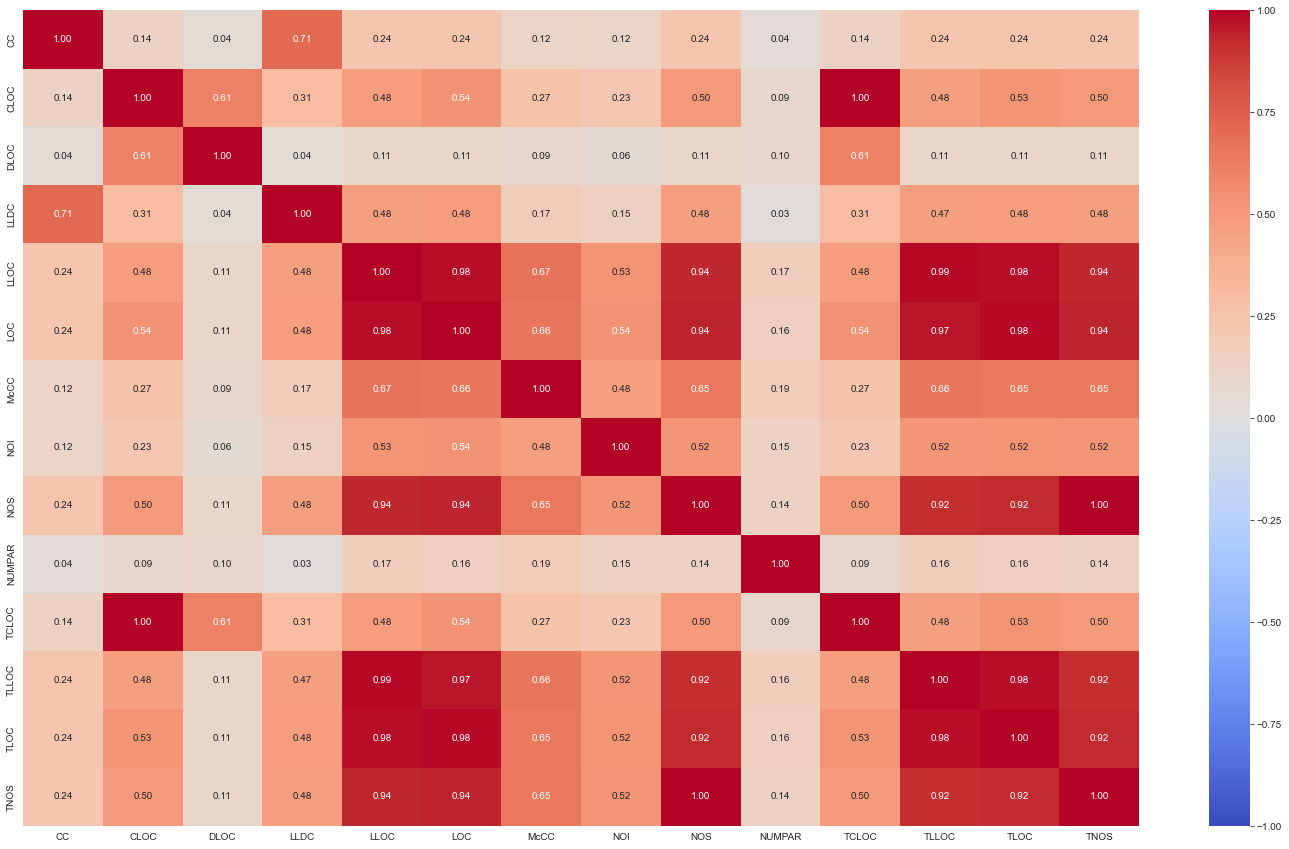

In [281]:
fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(method_metrics_corr_list, ax=ax, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

In [282]:
method_metrics_corr_list = method_metrics_corr_list[np.abs(method_metrics_corr_list) > 0.5]
for i in range(len(method_metrics_corr_list)):
    method_metrics_corr_list.iloc[i, i] = None
# delete rows and columns that have only NaN values
method_metrics_corr_list = method_metrics_corr_list.dropna(axis=0, how='all')
method_metrics_corr_list = method_metrics_corr_list.dropna(axis=1, how='all')
method_metrics_corr_list.head()

,CC,CLOC,DLOC,LLDC,LLOC,LOC,McCC,NOI,NOS,TCLOC,TLLOC,TLOC,TNOS
CC,NaN,NaN,NaN,0.71228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CLOC,NaN,NaN,0.611121,NaN,NaN,0.535512,NaN,NaN,NaN,0.999953,NaN,0.529590,NaN
DLOC,NaN,0.611121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.611080,NaN,NaN,NaN
LLDC,0.71228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LLOC,NaN,NaN,NaN,NaN,NaN,0.978883,0.672778,0.529999,0.935339,NaN,0.98883,0.981358,0.935339


<AxesSubplot:>

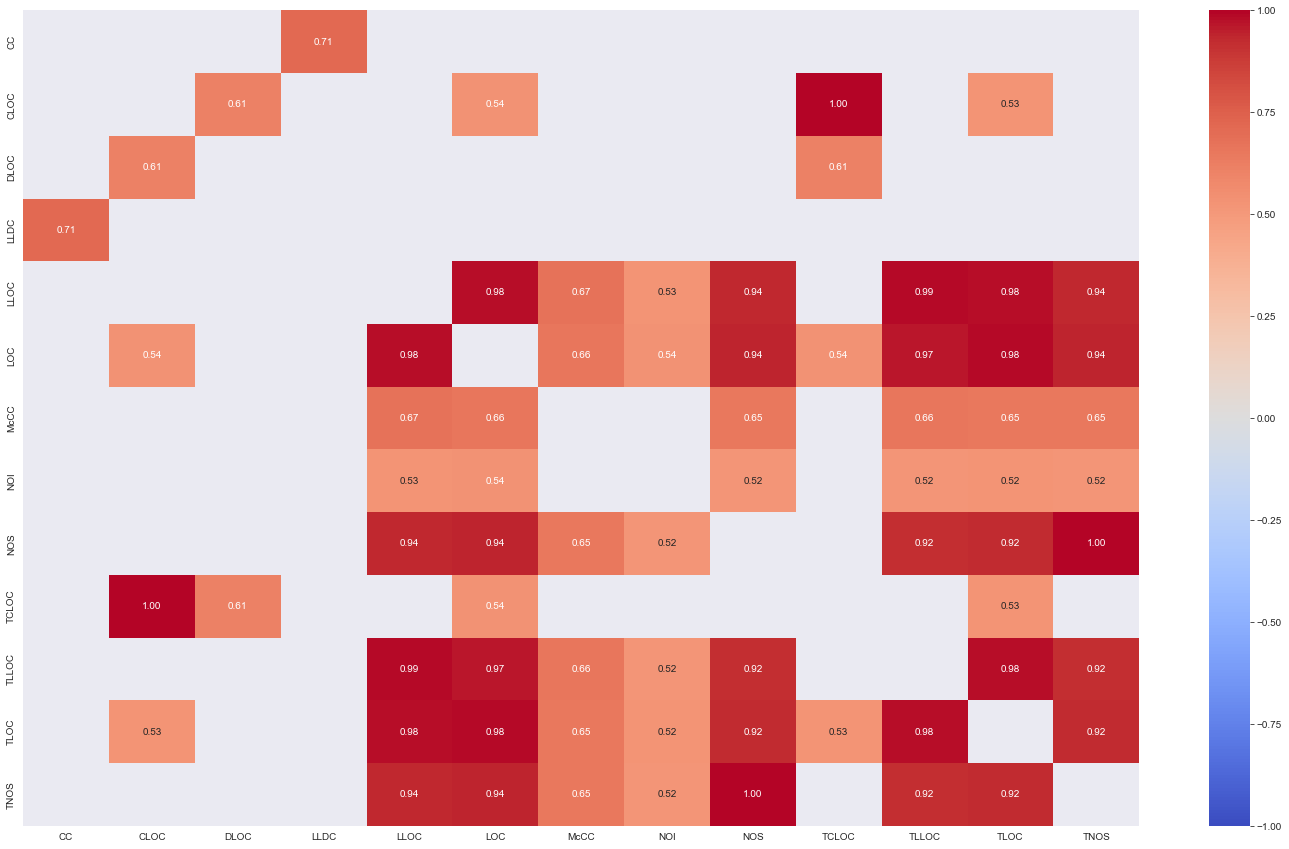

In [283]:
fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(method_metrics_corr_list, ax=ax, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

We can see, that there are a lot of pairs of metrics that have a high correlation. Some even have a correlation higher than 0.9 and even equal to 1.

In [284]:
print(f'There are {len(method_metrics_corr_list.columns)}/14 method metrics that have a correlation higher than 0.5 with at least one other metric.')
print(f'There are {count_pairs(method_metrics_corr_list, 0.5)}/{(14 * 13) / 2:.0f} ({count_pairs(method_metrics_corr_list, 0.5)/(14 * 13) * 100:.2f}%) pairs of method metrics that have a correlation higher than 0.5.')
print(f'There are {count_pairs(method_metrics_corr_list, 0.9)}/{(14 * 13) / 2:.0f} ({count_pairs(method_metrics_corr_list, 0.9)/(14 * 13) * 100:.2f}%) pairs of method metrics that have a correlation higher than 0.9.')
print(f'There are {count_pairs(method_metrics_corr_list, 0.97)}/{(14 * 13) / 2:.0f} ({count_pairs(method_metrics_corr_list, 0.97)/(14 * 13) * 100:.2f}%) pairs of method metrics that have a correlation higher than 0.97.')

There are 13/14 method metrics that have a correlation higher than 0.5 with at least one other metric.
There are 35/91 (19.23%) pairs of method metrics that have a correlation higher than 0.5.
There are 16/91 (8.79%) pairs of method metrics that have a correlation higher than 0.9.
There are 7/91 (3.85%) pairs of method metrics that have a correlation higher than 0.97.


In [285]:
print('Pairs of method metrics that have a correlation higher than 0.97:\n')

for i in range(len(method_metrics_corr_list)):
    for j in range(i + 1, len(method_metrics_corr_list)):
        if np.abs(method_metrics_corr_list.iloc[i, j]) > 0.97:
            print(f'{method_metrics_corr_list.columns[i]} - {method_metrics_corr_list.columns[j]}: {method_metrics_corr_list.iloc[i, j]:.2f}')

Pairs of method metrics that have a correlation higher than 0.97:

CLOC - TCLOC: 1.00
LLOC - LOC: 0.98
LLOC - TLLOC: 0.99
LLOC - TLOC: 0.98
LOC - TLOC: 0.98
NOS - TNOS: 1.00
TLLOC - TLOC: 0.98


As we can see, the highest correlation are between metrics related to number of lines. However, there are also metrics NOS and TNOS that have a high correlation with each other and related to number of statements.

Now let's calculate the maximum set of method metrics that would have only correlations lower than 0.75.

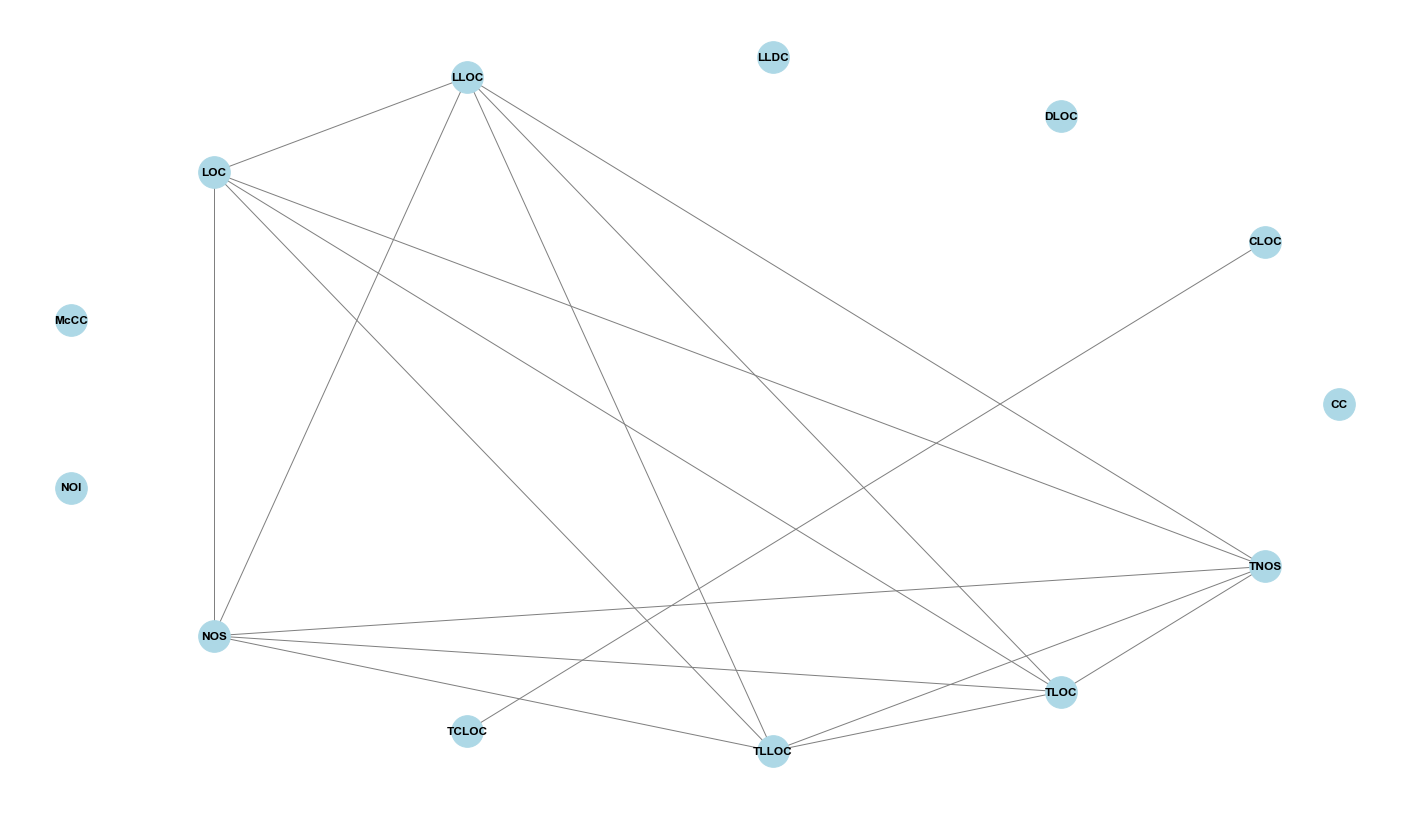

In [295]:
G = nx.Graph()
G.add_nodes_from(method_metrics_corr_list.columns)
for i in range(len(method_metrics_corr_list)):
    for j in range(i + 1, len(method_metrics_corr_list)):
        if np.abs(method_metrics_corr_list.iloc[i, j]) >= 0.75:
            G.add_edge(method_metrics_corr_list.columns[i], method_metrics_corr_list.columns[j])

fig, ax = plt.subplots(figsize=(25, 15))
layout = nx.circular_layout(G)
nx.draw(G, ax=ax, with_labels=True, font_weight='bold', node_size=1000, node_color='lightblue', edge_color='grey', pos=layout)
plt.show()

In [296]:
max_ind_G = approx.maximum_independent_set(G)
print(f'The maximum independent set of the graph has {len(max_ind_G)} nodes.\n\n')

for metric in max_ind_G:
    print_desc(metric, 'Method')
    print()

The maximum independent set of the graph has 7 nodes.


Logical Lines of Code (LLOC): Number of non-empty and non-comment code lines of the method; however, its anonymous classes are not included.

Documentation Lines of Code (DLOC): Number of documentation code lines of the method.

Logical Lines of Duplicated Code (LLDC): Number of logical code lines (non-empty, non-comment lines) covered by code duplications in the source code element.

Number of Outgoing Invocations (NOI): Number of directly called methods. If a method is invoked several times, it is counted only once.

Comment Lines of Code (CLOC): Number of comment and documentation code lines of the method; however, its anonymous classes are not included.

Clone Coverage (CC): Ratio of code covered by code duplications in the source code element to the size of the source code element, expressed in terms of the number of syntactic entities (statements, expressions, etc.).

McCabe’s Cyclomatic Complexity (McCC): Complexity of the 

In [288]:
print(f'The graph has {nx.number_connected_components(G)} connected components.')

The graph has 7 connected components.


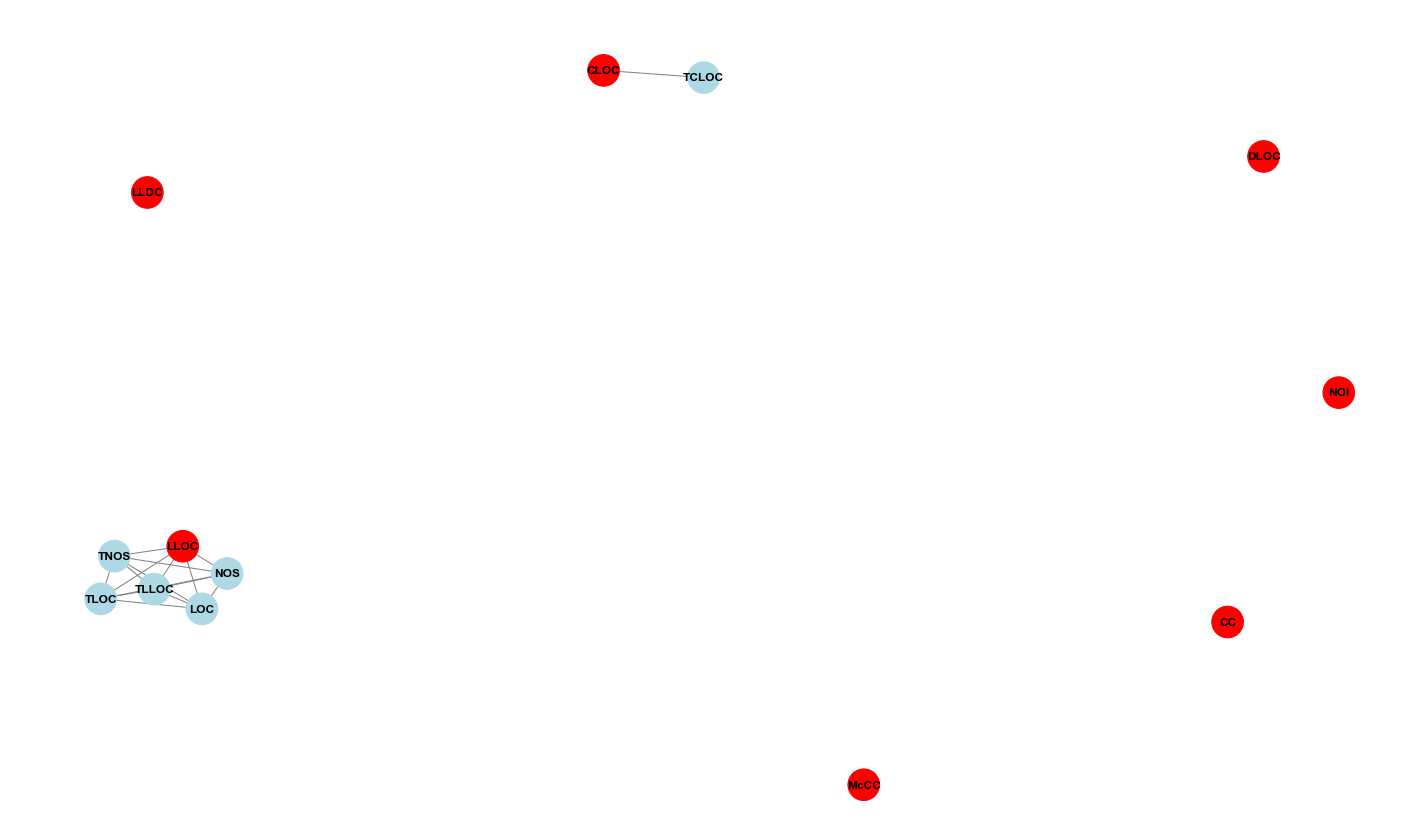

In [297]:
fig, ax = plt.subplots(figsize=(25, 15))
layout = nx.layout.spring_layout(G, k=0.35)
color_map = [] # highlight the nodes in the maximum independent set
for node in G:
    if node in max_ind_G:
        color_map.append('red')
    else:
        color_map.append('lightblue')
nx.draw(G, ax=ax, with_labels=True, font_weight='bold', node_size=1000, node_color=color_map, edge_color='grey', pos=layout)
plt.show()